In [ ]:
# librerías
import numpy as np
import skfuzzy as fz 
import matplotlib.pyplot as plt
from skfuzzy import control as ctrl

Variables de entrada y salida
* Entradas : error_posicion, velocidad_angular
* Salidas: Ajuste del Torque, Ajuste dirección Ángular




In [26]:
# Entradas
error_posicion = ctrl.Antecedent(np.arange(-15, 15, 0.1), 'error_posicion')
vel_angular = ctrl.Antecedent(np.arange(-5, 5, 0.1), 'vel_angular')

# Salidas
torque = ctrl.Consequent(np.arange(-20, 20, 0.1), 'torque')
dir_angular = ctrl.Consequent(np.arange(-30, 30, 0.1), 'dir_angular')


In [27]:
# Funciones de membresía

# Entrada
ancho = 2
error_posicion['muy negativo'] = fz.gaussmf(error_posicion.universe, mean=-8, sigma=ancho)
error_posicion['negativo'] = fz.gaussmf(error_posicion.universe, mean=-4, sigma=ancho)
error_posicion['cero'] = fz.gaussmf(error_posicion.universe, mean=0, sigma=ancho)
error_posicion['positivo'] = fz.gaussmf(error_posicion.universe, mean=4, sigma=ancho)
error_posicion['muy positivo'] = fz.gaussmf(error_posicion.universe, mean=8, sigma=ancho)

vel_angular['muy lento'] = fz.trapmf(vel_angular.universe, [-5, -5, -4, -3])
vel_angular['lento'] = fz.trimf(vel_angular.universe, [-5, -2.5, 0])
vel_angular['moderado'] = fz.trimf(vel_angular.universe, [-2, 0, 2])
vel_angular['rapido'] = fz.trimf(vel_angular.universe, [0, 2.5, 5])
vel_angular['muy rapido'] = fz.trapmf(vel_angular.universe, [3, 4, 5, 5])

# salida

torque['bajo'] = fz.trimf(torque.universe, [-20, -15, -10])
torque['medio'] = fz.trimf(torque.universe, [-10, 0, 10])
torque['alto'] = fz.trimf(torque.universe, [10, 15, 20])
torque['maximo'] = fz.trimf(torque.universe, [15, 20, 20])

dir_angular['izquierda extrema'] = fz.trimf(dir_angular.universe, [-30, -25, -15])
dir_angular['izquierda'] = fz.trimf(dir_angular.universe, [-20, -10, 0])
dir_angular['derecha'] = fz.trimf(dir_angular.universe, [0, 10, 20])
dir_angular['derecha extrema'] = fz.trimf(dir_angular.universe, [15, 25, 30])


c:\Users\Bremdow\anaconda3\envs\modelos-ia\Lib\site-packages\skfuzzy\control\fuzzyvariable.py:125: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


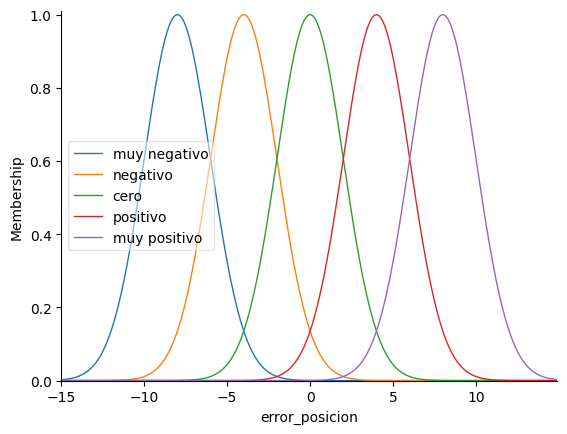

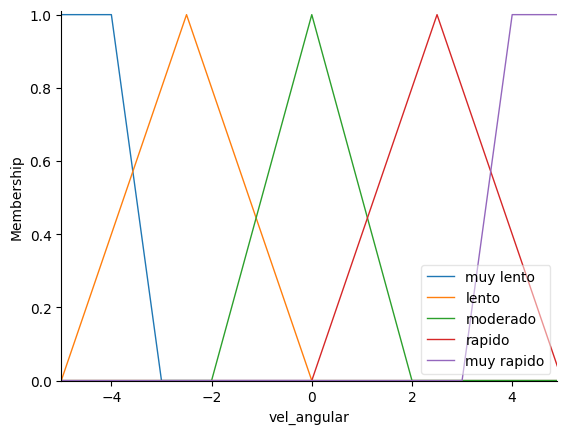

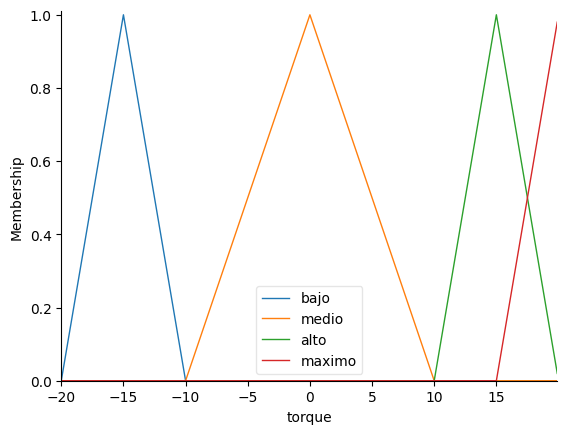

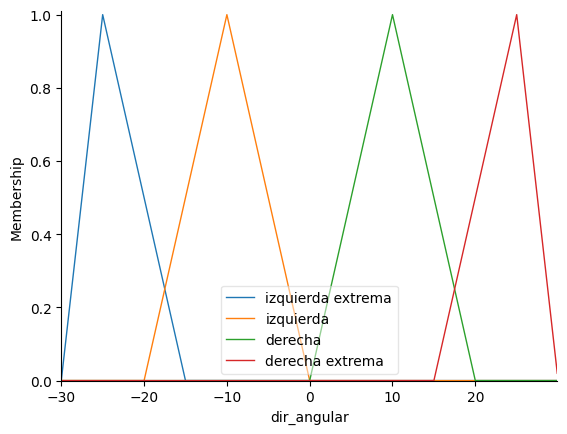

In [28]:
error_posicion.view()
vel_angular.view()
torque.view()
dir_angular.view()